## Домашнее задание по теме: "Деревья решений"

Описание задания:
В домашнем задании нужно решить задачу регрессии. В качестве датасета необходимо взять данные о недвижимости Калифорнии из библиотеки sklearn.datasets. Целевая переменная – MedHouseVal. Прочитать информацию о признаках датасета можно, выполнив следующий код – print(fetch_california_housing().DESCR). На полученных данных построить модель регрессии и дерево решений.

### 1. Получите данные и загрузите их в рабочую среду.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [ ]:
# получение датасета
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [ ]:
# конвертация датасета в pandas dataframe
df = pd.DataFrame(data=np.c_[housing['data'], housing['target']],
                  columns=housing['feature_names'] + ['MedHouseVal'])

df.shape

(20640, 9)

### 2. Проведите первичный анализ.

a.Проверьте данные на пропуски. Удалите в случае обнаружения.

b.*Нормализуйте один из признаков.

In [ ]:
# проверка на пропуски
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

Пропуски отсутствуют.

In [ ]:
# масштабирование признака Population
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df['Population'] = scaler.fit_transform(df[['Population']])

In [ ]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,-0.974429,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,0.861439,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,-0.820777,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,-0.766028,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,-0.759847,2.181467,37.85,-122.25,3.422


### 3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(['MedHouseVal'], axis=1),
                                                    df['MedHouseVal'],
                                                    test_size=0.2,
                                                    random_state=42)

### 4. Обучите модель регрессии на обучающем множестве.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model =  LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### 5. Для тестового множества предскажите целевую переменную и сравните с истинным значением, посчитав точность предсказания модели. Для этого используйте встроенную функцию score.

In [ ]:
model.score(X_test, y_test)

0.5757877060324512

### 6. Обучите дерево решений на обучающем множестве.

a. Повторите п. 5 для полученной модели.

b. Визуализируйте часть дерева решений. Убедитесь, что график получился читабельным.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# обучение дерева решений
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# получение метрики
model.score(X_test, y_test)

0.622075845135081

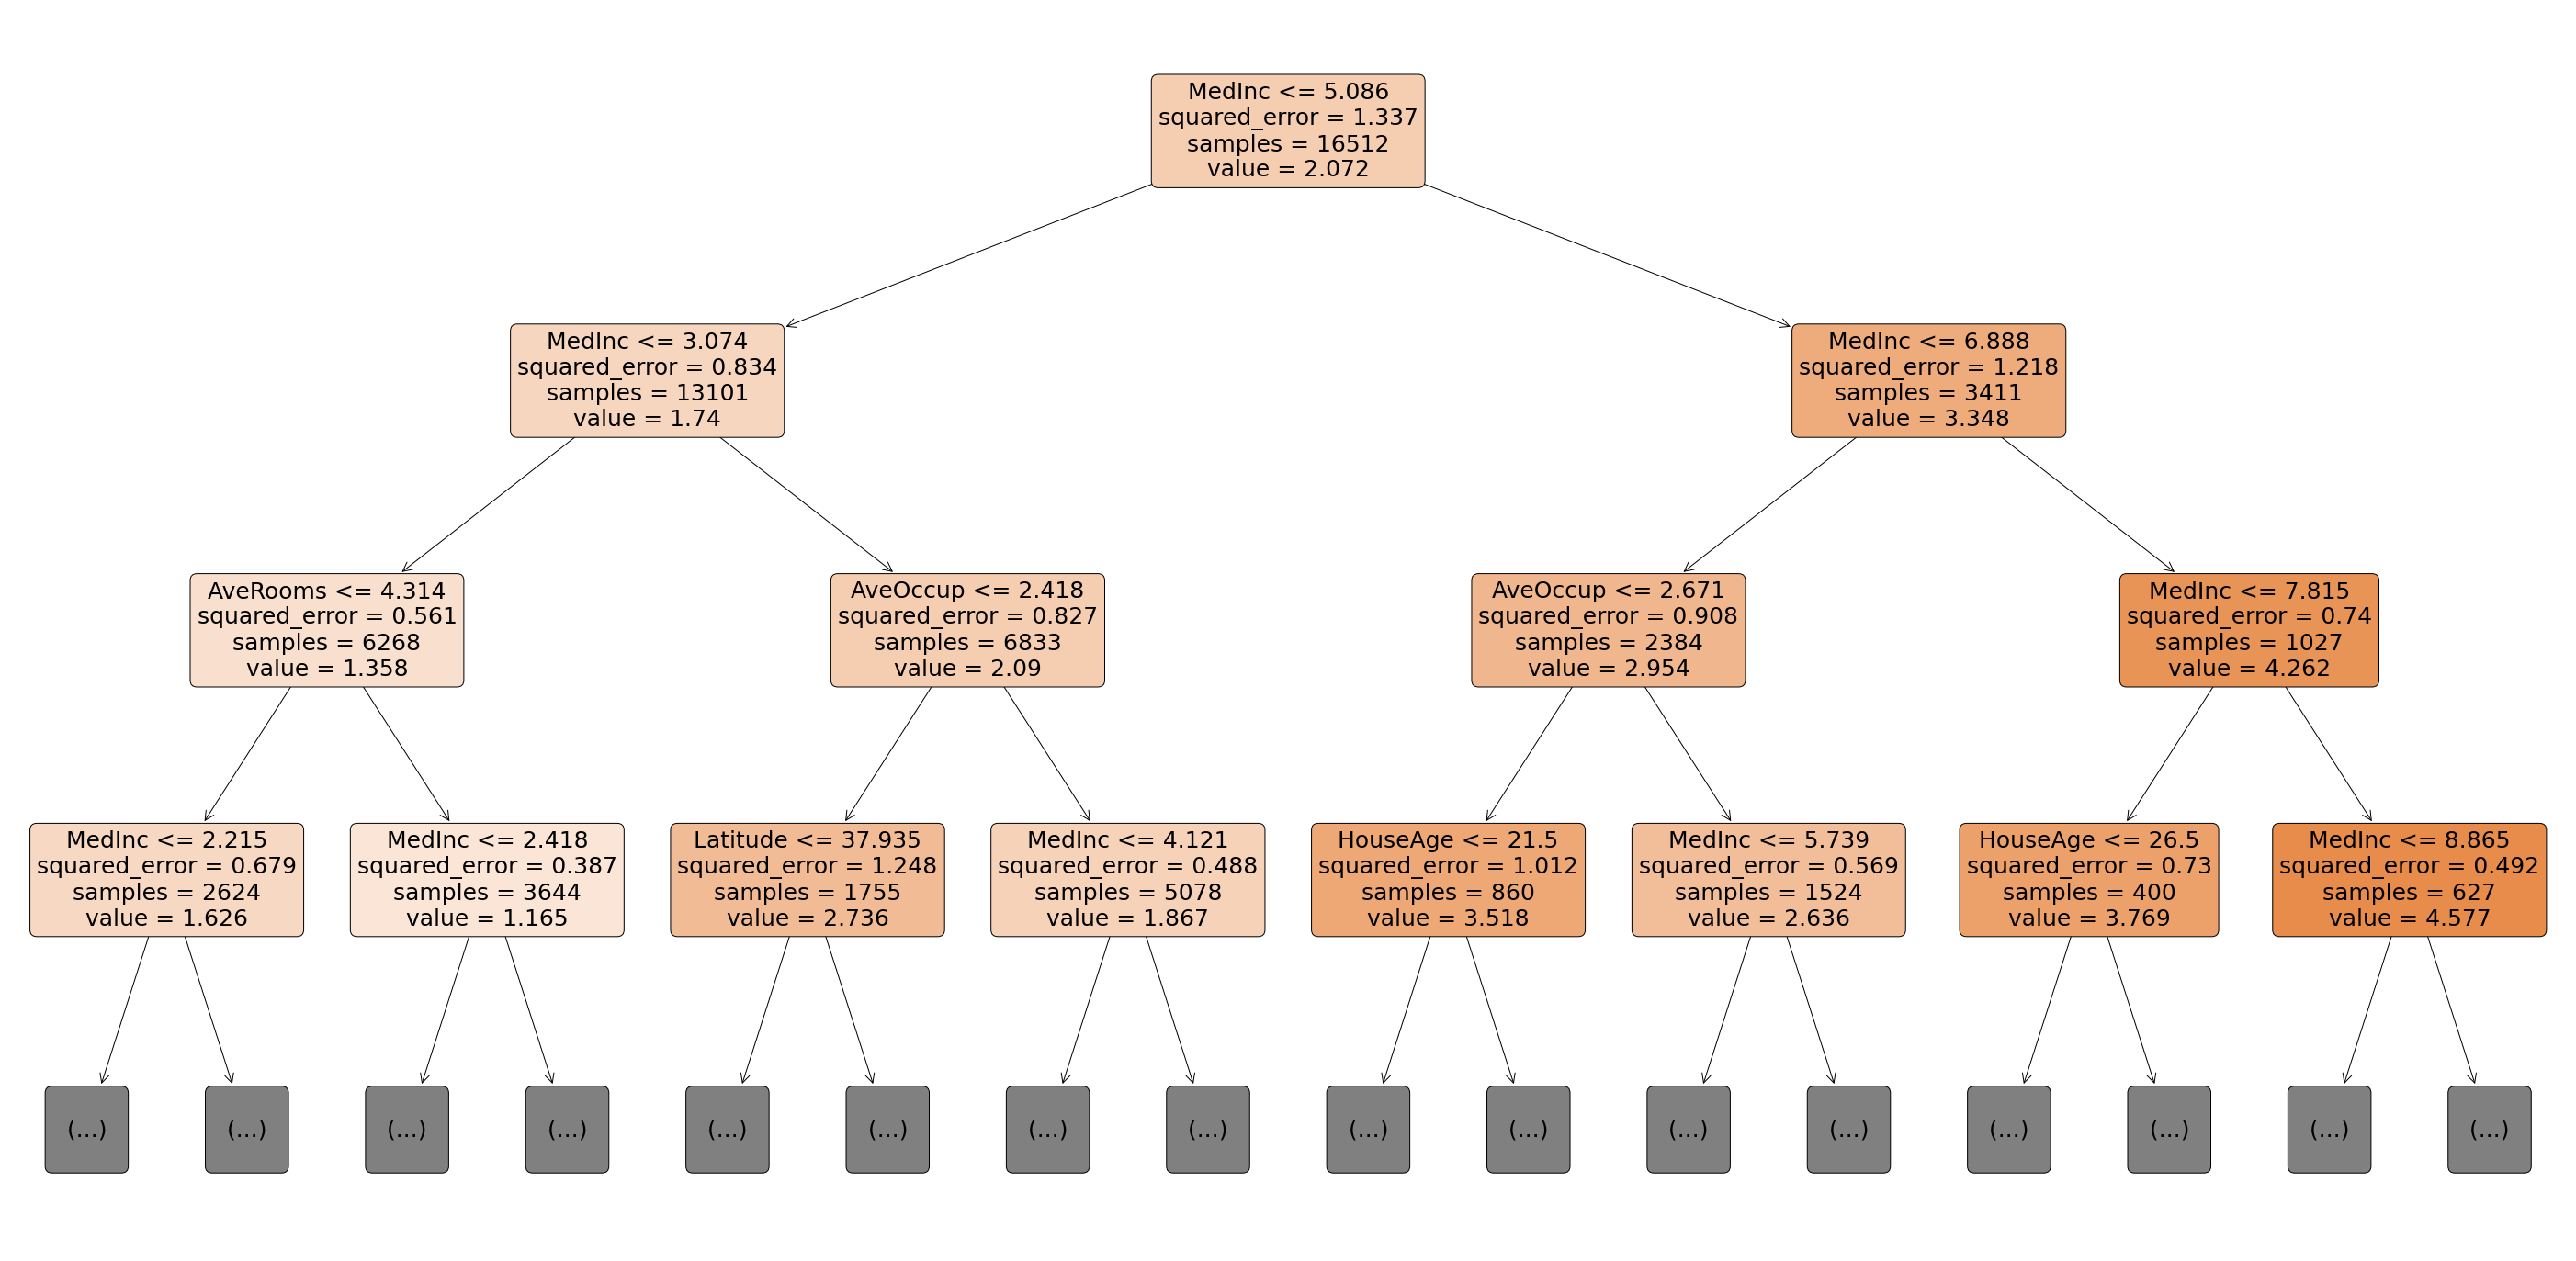

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(50,25))
tree = plot_tree(model,
              feature_names=df[df.columns.drop('MedHouseVal')].columns,
              max_depth=3,
              filled=True,
              rounded=True,
              fontsize=25)

### 7. Оптимизируйте глубину дерева (max_depth). *Оптимизируйте ещё один параметр модели на выбор.

a. Повторите п. 5 для полученной модели.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# обучение дерева решений
model = DecisionTreeRegressor(max_depth=8, min_samples_leaf=4, random_state=42)
model.fit(X_train, y_train)

# получение метрики
model.score(X_test, y_test)

0.6814403939504698

### 8. Сформулируйте выводы по проделанной работе.

a. Сравните точность двух моделей.

b. Напишите свое мнение, для каких задач предпочтительнее использовать обученные в работе модели? Какие у них есть плюсы и минусы?

Дерево решений, в сравнении с линейной регрессией, показало лучший результат, а при оптимизации параметров глубины и минимального колиечества объектов в листьях результат удалось дополнительно улучшить.

Дерево решений удобно в плане визуализации и "понятности" решений о предсказании тех или иных целевых значений, так же к плюсам относится то, что данные не требуют подготовки (удаление пропусков и т.д. (но не в случае с sklearn)). Логику его работы весьма просто объяснить.

К минусам данного метода можно отнести плохую экстраполяцию, чувствительность к шумам во входных данных.

Касательно задач - думаю использовать можно в тех же сферах где и "классические модели", необходимо отталкиваться от конкретной задачи и результатах которые дает та или иная модель.